In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= pd.read_csv('Feedback.csv')
data.head()

,Month,Ticket,Rating,Resolving Agent,Comment
0,Dec'20,SR10831576,Strongly Agree,Pulkit Chopra,Keep up the good work!
1,Dec'20,SR10830807,Agree,Ramit Singh,Very helpful and friendly.
2,Dec'20,IN10480983,Strongly Agree,Pragya sinha,Very friendly and professional service
3,Dec'20,SR10830665,Strongly Agree,Liji Kuriakose,Great service guys. Keep it up
4,Dec'20,IN10479781,Strongly Disagree,Komal Tanwar,The issue was not resolved for almost 5 days ...


In [5]:
data.isna().sum()

Month              0
Ticket             0
Rating             0
Resolving Agent    0
Comment            0
dtype: int64

In [6]:
data.dtypes


Month              object
Ticket             object
Rating             object
Resolving Agent    object
Comment            object
dtype: object

In [7]:
data['Rating'].value_counts()

Strongly Agree        208
Agree                 103
Strongly Disagree      24
Neutral                23
Disagree               15
Stronglee Disagree      1
Name: Rating, dtype: int64

In [8]:
data=data.replace(to_replace ="Strongly Agree", value =5)
data=data.replace(to_replace ="Agree", value =4)
data=data.replace(to_replace ="Neutral", value =3)
data=data.replace(to_replace ="Disagree", value =2)
data=data.replace(to_replace ="Strongly Disagree", value =1)
data=data.replace(to_replace ="Stronglee Disagree", value =1)

In [9]:
data

,Month,Ticket,Rating,Resolving Agent,Comment
0,Dec'20,SR10831576,5,Pulkit Chopra,Keep up the good work!
1,Dec'20,SR10830807,4,Ramit Singh,Very helpful and friendly.
2,Dec'20,IN10480983,5,Pragya sinha,Very friendly and professional service
3,Dec'20,SR10830665,5,Liji Kuriakose,Great service guys. Keep it up
4,Dec'20,IN10479781,1,Komal Tanwar,The issue was not resolved for almost 5 days ...
...,...,...,...,...,...
369,Apr'20,SR10738765,1,Tanya,reseting password should use via phone number...
370,Apr'20,SR10740919,4,Rahul Sharma,Good work
371,Apr'20,SR10737392,5,Mihir Chauhan,Thank you it was great help. Stay safe :)
372,Apr'20,SR10741472,5,Priya Dubey,The system was asking a different question th...


In [10]:
! pip install nltk
! pip install  wordcloud


In [11]:
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [13]:
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize']=14,6
plt.style.use('ggplot')


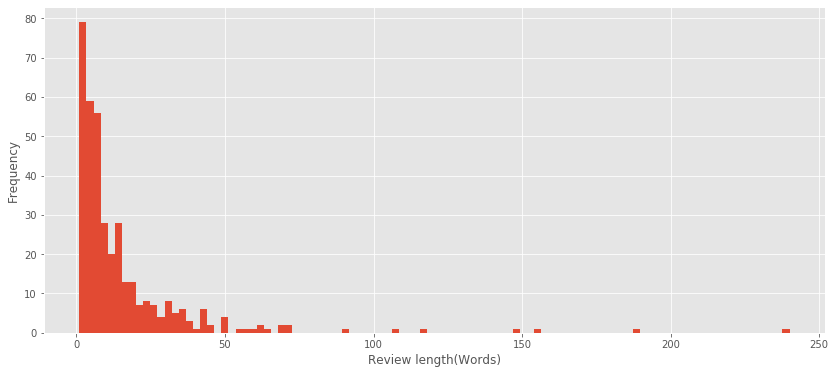

In [14]:
words_per_review = data.Comment.apply(lambda x: len(x.split(' ')))
words_per_review.hist(bins=100)
plt.xlabel('Review length(Words)')
plt.ylabel('Frequency')
plt.show()

In [15]:
print('Average Words per review=',np.mean(words_per_review))

Average Words per review= 15.657754010695188


In [16]:
per_val=100*data['Rating'].value_counts()/len(data)
per_val

5    55.614973
4    27.540107
1     6.684492
3     6.149733
2     4.010695
Name: Rating, dtype: float64

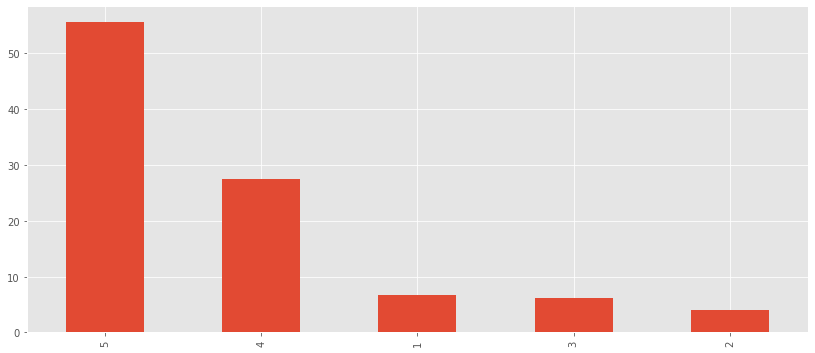

In [17]:
per_val.plot.bar()

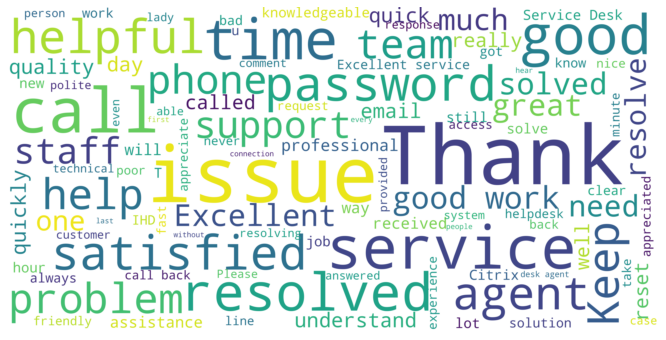

In [19]:
word_cloud_text=''.join(data['Comment'])
wordcloud=WordCloud(max_font_size=100,max_words=100,background_color='white',scale=10,width=800,height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
data['SentimentRating']=np.where(data.Rating>3,1,0)
data=data[data.Rating !=3]
data['SentimentRating'].value_counts()

1    311
0     40
Name: SentimentRating, dtype: int64

In [21]:
data['Comment_new']=data['Comment'].str.lower()

In [22]:
from nltk import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ps783\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
token_lists=[word_tokenize(each) for each in data['Comment']]
tokens=[item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

token_lists_lower=[word_tokenize(each) for each in data['Comment_new']]
tokens_lower=[item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))




Number of unique tokens then:  1142
Number of unique tokens now:  994


In [29]:
spl_chars=data['Comment_new'].apply(lambda comment:
                                    [char for char in list(comment) if not char.isalnum() and char != ' '])
flat_list=[item for sublist in spl_chars for item in sublist]
set(flat_list)

{'!', '&', "'", '(', ')', ',', '-', '.', '/', ':', '?', '’', '“', '”'}

In [31]:
data_backup=data['Comment_new'].copy()
data['Comment_new']=data['Comment_new'].str.replace(r'[^A-Za-z0-9]+', ' ')


In [32]:
print(" - old reviews-")
print(data_backup.values[6])
print(" - New reviews-")
print(data['Comment_new'][6])

 - old reviews-
 the quality of the call was poor- it was difficult to hear the service desk agent, however this was a technical issue. the service desk agent was helpful and resolved my issue efficiently.
 - New reviews-
 the quality of the call was poor it was difficult to hear the service desk agent however this was a technical issue the service desk agent was helpful and resolved my issue efficiently 


In [33]:
token_lists=[word_tokenize(each) for each in data['Comment']]
tokens=[item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

token_lists_lower=[word_tokenize(each) for each in data['Comment_new']]
tokens_lower=[item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))


Number of unique tokens then:  1142
Number of unique tokens now:  960


In [34]:
from nltk.corpus import stopwords
print("Available language")
print(stopwords.fileids())

Available language
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [35]:
noise_words=[]
eng_stop=stopwords.words("english")
eng_stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
stop_words=set(eng_stop)
without_stop=[]
stopword=[]
sentence=data['Comment_new'][0]
words=nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop.append(word)


print("----original sentence ----\n",sentence)
print("----stopword sentence ----\n",stopword)
print("----non stop words in sentence ----\n",without_stop)

----original sentence ----
 keep up the good work 
----stopword sentence ----
 ['up', 'the']
----non stop words in sentence ----
 ['keep', 'good', 'work']


In [50]:
def stopwords_removal(stop_words,sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]
data['review_text_nonstop']=data['Comment_new'].apply(lambda row: stopwords_removal(stop_words,row))
data[['Comment_new','review_text_nonstop']]

,Comment_new,review_text_nonstop
0,keep up the good work,"[keep, good, work]"
1,very helpful and friendly,"[helpful, friendly]"
2,very friendly and professional service,"[friendly, professional, service]"
3,great service guys keep it up,"[great, service, guys, keep]"
4,the issue was not resolved for almost 5 days ...,"[issue, resolved, almost, 5, days, finally, on..."
...,...,...
369,reseting password should use via phone number...,"[reseting, password, use, via, phone, number, ..."
370,good work,"[good, work]"
371,thank you it was great help stay safe,"[thank, great, help, stay, safe]"
372,the system was asking a different question th...,"[system, asking, different, question, set]"


In [51]:
from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter=PorterStemmer()
lancaster=LancasterStemmer()
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ps783\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [53]:
data[['Comment','Rating','SentimentRating']].head(5)


,Comment,Rating,SentimentRating
0,Keep up the good work!,5,1
1,Very helpful and friendly.,4,1
2,Very friendly and professional service,5,1
3,Great service guys. Keep it up,5,1
4,The issue was not resolved for almost 5 days ...,1,0


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
X=vec.fit_transform(data['Comment_new'])
df=pd.DataFrame(X.toarray(),columns=vec.get_feature_names())
df.head()

,01,10,10pm,11th,1600,19,20,2020,24,2nd,...,working,would,write,wrong,wrote,years,yet,you,your,zones
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
bow_counts=CountVectorizer(tokenizer=word_tokenize,stop_words=noise_words,ngram_range=(1,1))
bow_data=bow_counts.fit_transform(data['Comment_new'])

In [58]:
bow_data

<351x960 sparse matrix of type '<class 'numpy.int64'>'
	with 4024 stored elements in Compressed Sparse Row format>

In [65]:
X_train_bow,X_test_bow,y_train_bow,y_test_bow=train_test_split(bow_data,data['SentimentRating'],test_size=0.2,random_state=0)

In [66]:
y_test_bow.value_counts()/y_test_bow.shape[0]


1    0.887324
0    0.112676
Name: SentimentRating, dtype: float64

In [72]:
lr_model_all=LogisticRegression()
lr_model_all.fit(X_train_bow,y_train_bow)
test_pred_lr_all=lr_model_all.predict(X_test_bow)
print("F1 score:",f1_score(y_test_bow,test_pred_lr_all))

F1 score: 0.9393939393939393


In [70]:
bow_counts=CountVectorizer(tokenizer=word_tokenize,ngram_range=(1,4))
bow_data=bow_counts.fit_transform(data.Comment_new)

In [73]:
bow_data

<351x11431 sparse matrix of type '<class 'numpy.int64'>'
	with 16352 stored elements in Compressed Sparse Row format>

In [74]:
X_train_bow,X_test_bow,y_train_bow,y_test_bow=train_test_split(bow_data,data['SentimentRating'],test_size=0.2,random_state=0)

In [75]:
lr_model_all_new=LogisticRegression(max_iter=200)
lr_model_all_new.fit(X_train_bow,y_train_bow)
test_pred_lr_all=lr_model_all_new.predict(X_test_bow)
print("F1 score:",f1_score(y_test_bow,test_pred_lr_all))

F1 score: 0.9473684210526316


In [76]:
lr_weights=pd.DataFrame(list(zip(bow_counts.get_feature_names(),lr_model_all_new.coef_[0])),
                        columns=['words','weights'])
lr_weights.sort_values(['weights'],ascending=False)[:15]

,words,weights
10318,very,0.841138
3469,good,0.586214
7880,service,0.566188
11316,you,0.547229
2861,excellent,0.473077
8651,thank,0.438861
8658,thank you,0.436216
725,and,0.251317
3245,for the,0.234341
3820,helpful,0.226955


In [79]:
lr_weights=pd.DataFrame(list(zip(bow_counts.get_feature_names(),lr_model_all_new.coef_[0])),
                        columns=['words','weights'])
lr_weights.sort_values(['weights'],ascending=True)[:15]

,words,weights
7777,satisfied,-0.794261
8704,thanks for help,-0.700169
3211,for help,-0.700169
581,all marked above,-0.505760
320,above,-0.505760
580,all marked,-0.505760
5523,marked above,-0.505760
5522,marked,-0.505760
6226,of,-0.492564
6069,not,-0.465204
